In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [5]:
# Load dataset
file_path = r"C:\Users\LENOVO\OneDrive\Desktop\mcdonalds.csv"
data = pd.read_csv(file_path)

In [6]:
# Extract numeric values from 'Like' column
data['Like_Score'] = data['Like'].str.extract(r'([-+]?\d+)').astype(float)

In [7]:
# Drop rows with NaN values in 'Like_Score' column
data = data.dropna(subset=['Like_Score'])

In [8]:
# Segment analysis
seg_analysis = data.groupby(['VisitFrequency', 'Gender']).agg({
    'Like_Score': ['mean', 'std', 'count'],
    'Age': ['mean', 'std']
}).reset_index()

Text(0, 0.5, 'Frequency')

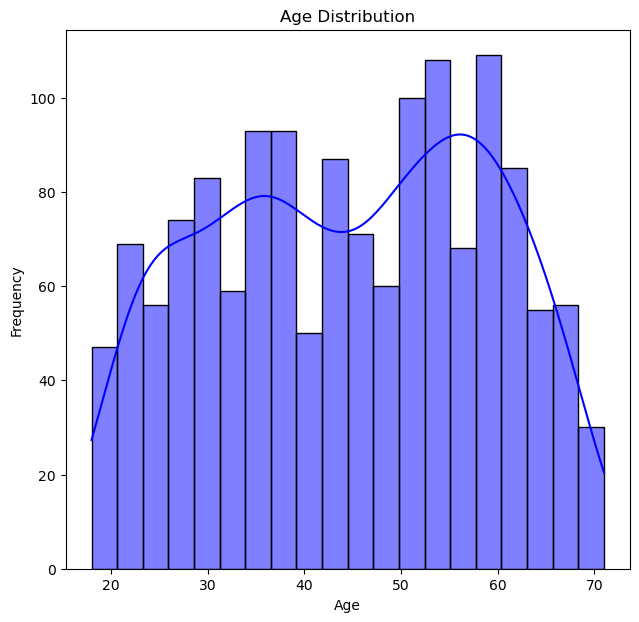

In [9]:
# Plot distributions
plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
sns.histplot(data['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

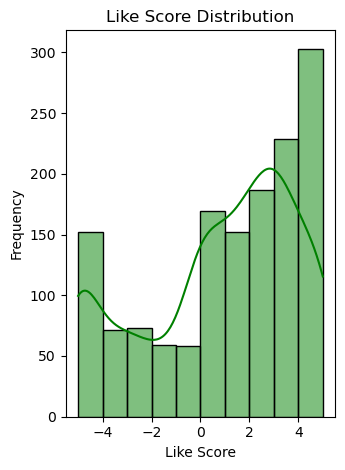

In [10]:
plt.subplot(1, 2, 2)
sns.histplot(data['Like_Score'], bins=10, kde=True, color='green')
plt.title('Like Score Distribution')
plt.xlabel('Like Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

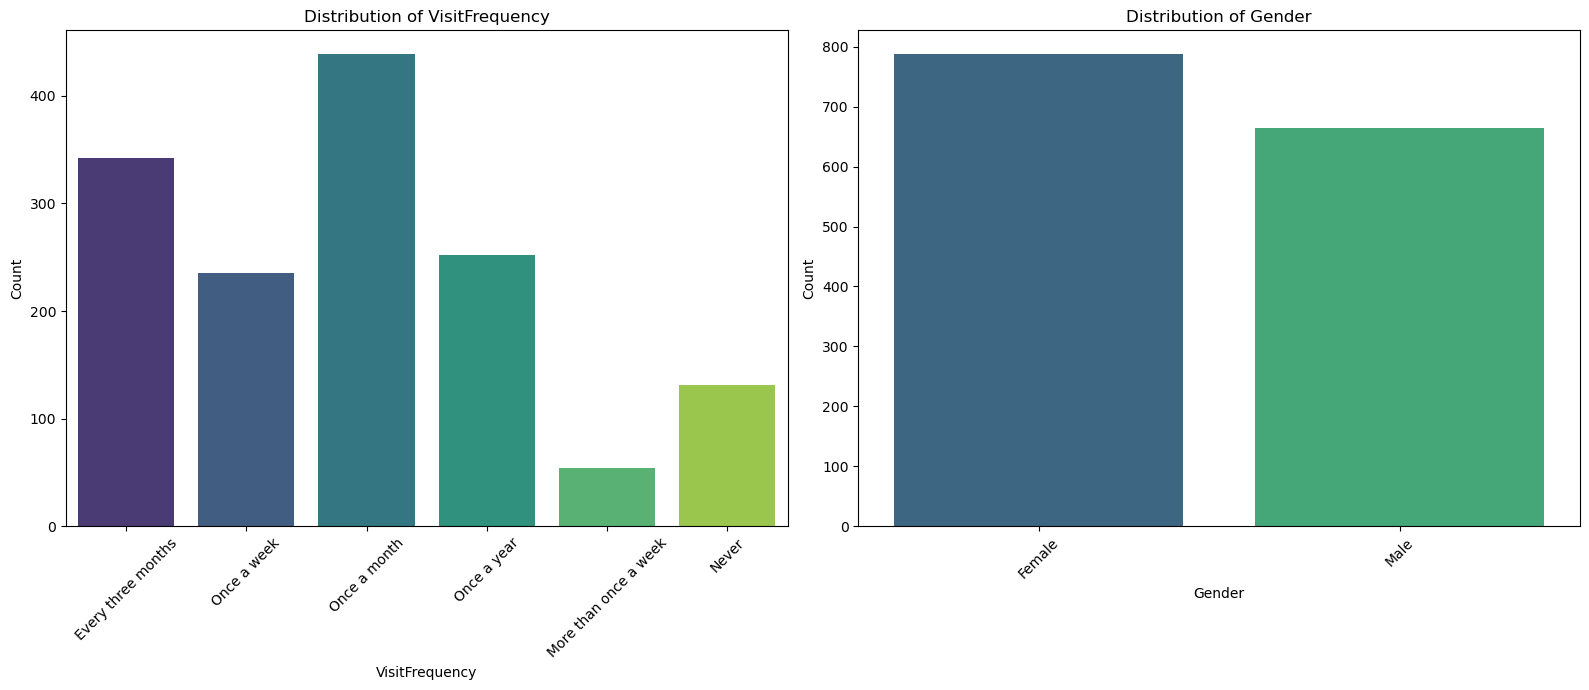

In [11]:
# Count plots for categorical variables
plt.figure(figsize=(16, 7))
for i, var in enumerate(['VisitFrequency', 'Gender'], 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=var, data=data, palette='viridis')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Statistical testing
t_stat, p_val = ttest_ind(data[data['Gender'] == 'Female']['Like_Score'],
                          data[data['Gender'] == 'Male']['Like_Score'])
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 1.8720595052750069, P-value: 0.061399389991867344


In [13]:
# Predictive modeling with Random Forest
X = data[['Age']]
y = (data['Like_Score'] >= 0).astype(int)  # Binary classification

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [15]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.02      0.03       114
           1       0.69      0.98      0.81       250

    accuracy                           0.68       364
   macro avg       0.49      0.50      0.42       364
weighted avg       0.56      0.68      0.56       364



In [16]:
# Example of segment analysis based on criteria
target_segments = seg_analysis[seg_analysis[('Like_Score', 'mean')] > 2]
print(target_segments)

          VisitFrequency  Gender Like_Score                        Age  \
                                       mean       std count       mean   
2  More than once a week  Female   4.076923  1.354196    26  34.846154   
3  More than once a week    Male   3.642857  1.725930    28  40.821429   
6           Once a month  Female   2.383966  2.041995   237  42.375527   
7           Once a month    Male   2.029703  2.065858   202  42.222772   
8            Once a week  Female   3.313559  1.915743   118  38.745763   
9            Once a week    Male   2.641026  2.147418   117  38.760684   

              
         std  
2  15.668292  
3  15.246259  
6  13.563032  
7  13.831426  
8  12.522244  
9  13.782579  
